<h2 align='center'> TF-IDF</h2>

Cargar el corpus del JSON usando Pandas:

In [1]:
import json

with open('recursos/corpus_NOstopword_tokenizado.json', 'r', encoding='utf-8') as file:
    corpus = json.load(file)

In [2]:
X = [documento['tokens_sin_stopwords'] for documento in corpus]
y = [documento['materia'] for documento in corpus]

In [3]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = [' '.join(documento['tokens_sin_stopwords']) for documento in corpus]

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X_tfidf = vectorizer.fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

<h3>Train the models</h3>

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [7]:
# KNN
knn_clf = Pipeline([
    ('knn', KNeighborsClassifier())
])
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

  artistica_3       0.00      0.00      0.00       0.0
  artistica_4       0.00      0.00      0.00       1.0
  artistica_6       0.00      0.00      0.00       0.0
   ciencias_1       0.00      0.00      0.00       0.0
   ciencias_2       0.00      0.00      0.00       0.0
   ciencias_6       0.00      0.00      0.00       0.0
     civica_1       0.00      0.00      0.00       0.0
     civica_2       0.00      0.00      0.00       0.0
     civica_3       0.00      0.00      0.00       1.0
     civica_6       0.00      0.00      0.00       1.0
  espanol_6_1       0.00      0.00      0.00       1.0
 español_3_1       0.00      0.00      0.00       1.0
  geografia_6       0.00      0.00      0.00       0.0
   historia_5       0.00      0.00      0.00       1.0
matematicas_4       0.00      0.00      0.00       1.0
matematicas_6       0.00      0.00      0.00       1.0

     accuracy                       

C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [8]:
# Multinomial Naive Bayes
nb_clf = Pipeline([
    ('nb', MultinomialNB())
])
nb_clf.fit(X_train, y_train)
nb_y_pred = nb_clf.predict(X_test)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))

Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

  artistica_4       0.00      0.00      0.00       1.0
  artistica_6       0.00      0.00      0.00       0.0
     civica_1       0.00      0.00      0.00       0.0
     civica_2       0.00      0.00      0.00       0.0
     civica_3       0.00      0.00      0.00       1.0
     civica_6       0.00      0.00      0.00       1.0
  espanol_5_1       0.00      0.00      0.00       0.0
  espanol_6_1       0.00      0.00      0.00       1.0
 español_3_1       0.00      0.00      0.00       1.0
   historia_4       0.00      0.00      0.00       0.0
   historia_5       0.00      0.00      0.00       1.0
matematicas_3       0.00      0.00      0.00       0.0
matematicas_4       0.00      0.00      0.00       1.0
matematicas_5       0.00      0.00      0.00       0.0
matematicas_6       0.00      0.00      0.00       1.0

     accuracy                           0.00       8.0
    macro avg   

C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [9]:
# Random Forest
rf_clf = Pipeline([
    ('rf', RandomForestClassifier())
])
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Classification Report:
                precision    recall  f1-score   support

   artistica_3       0.00      0.00      0.00       0.0
   artistica_4       0.00      0.00      0.00       1.0
      civica_1       0.00      0.00      0.00       0.0
      civica_3       0.00      0.00      0.00       1.0
      civica_6       0.00      0.00      0.00       1.0
constitucion_4       0.00      0.00      0.00       0.0
   espanol_5_1       0.00      0.00      0.00       0.0
   espanol_6_1       0.00      0.00      0.00       1.0
  español_3_1       0.00      0.00      0.00       1.0
    historia_5       0.00      0.00      0.00       1.0
 matematicas_2       0.00      0.00      0.00       0.0
 matematicas_3       0.00      0.00      0.00       0.0
 matematicas_4       0.00      0.00      0.00       1.0
 matematicas_6       0.00      0.00      0.00       1.0

      accuracy                           0.00       8.0
     macro avg       0.00      0.00      0.00       8.0
  weighte

C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\theso\PycharmProjects\exercisesSSC\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

<h3>Evaluate the models</h3>

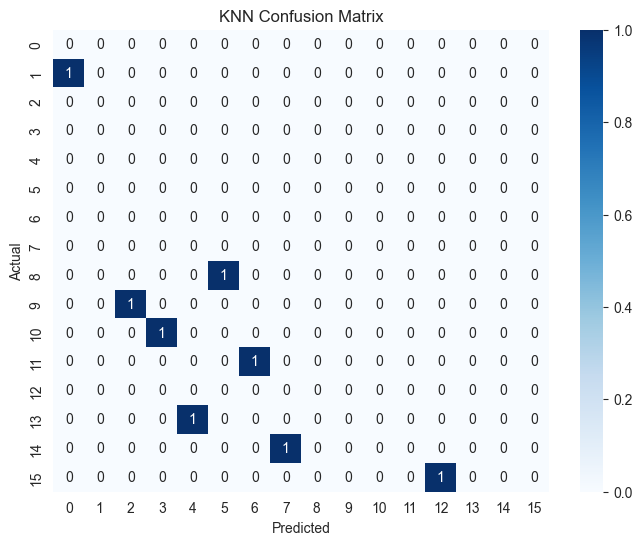

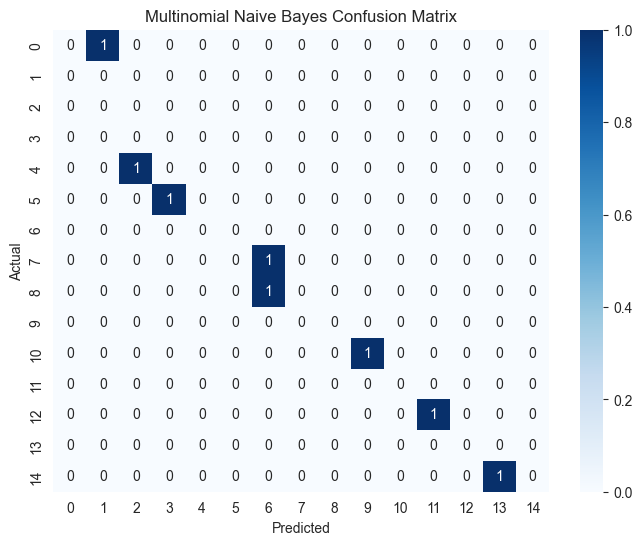

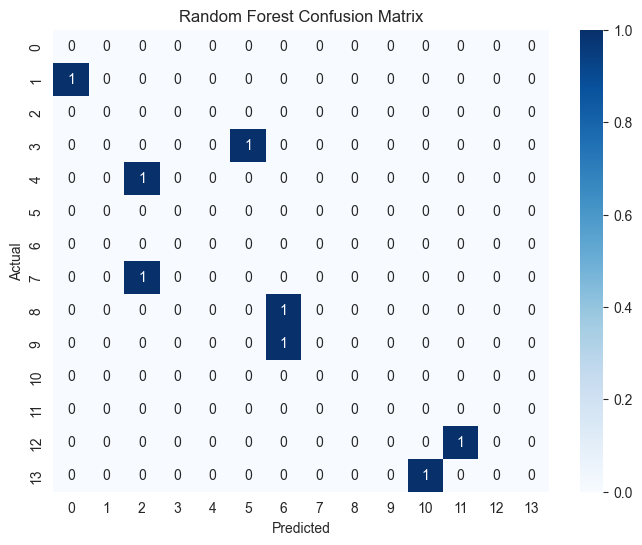

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# KNN Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Multinomial Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()